# Vježba: Obrada i odabir karakteristika na primjeru dijabetesa
Dataset: `pima_indians_diabetes.csv`

Ova vježba uključuje obradu podataka, analizu karakteristika, skaliranje, enkodiranje i metode odabira karakteristika (korelacija, permutacije, SHAP).

In [11]:
import pandas as pd

# Učitavanje podataka
df = pd.read_csv("pima_indians_diabetes.csv")

# Osnovne informacije
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
# Statistički pregled i provjera nedostajućih vrijednosti
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

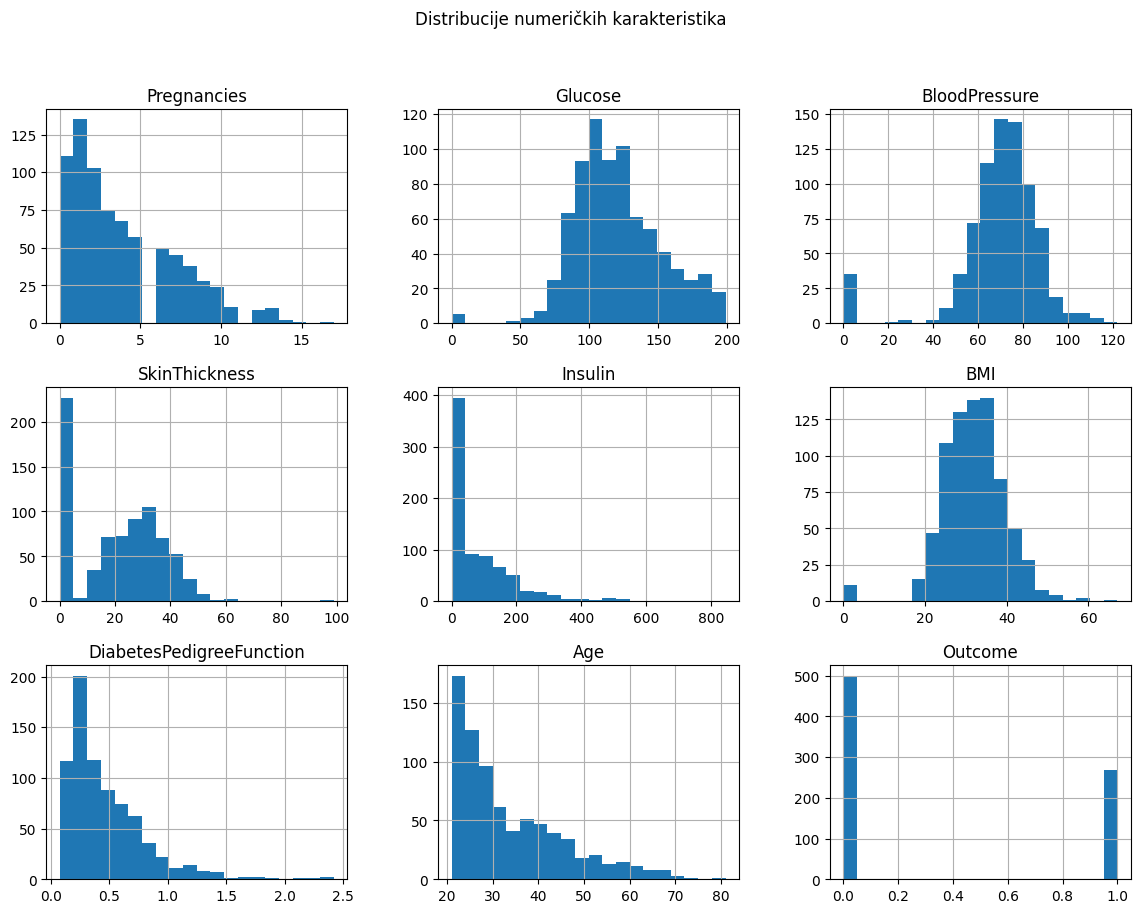

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribucije numeričkih karakteristika")
plt.show()

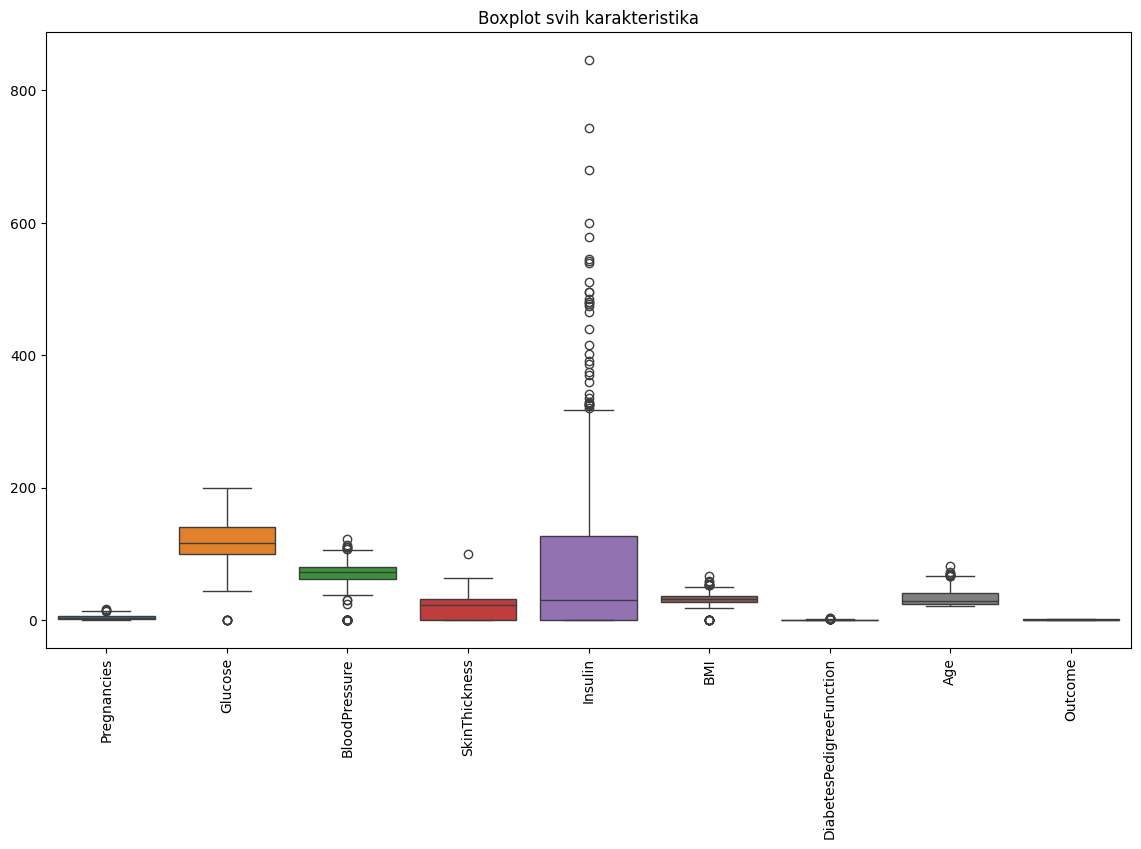

In [16]:
# Boxplot za outliere
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.title("Boxplot svih karakteristika")
plt.xticks(rotation=90)
plt.show()

In [17]:
# Zamjena nula sa medijanima za relevantne kolone
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())

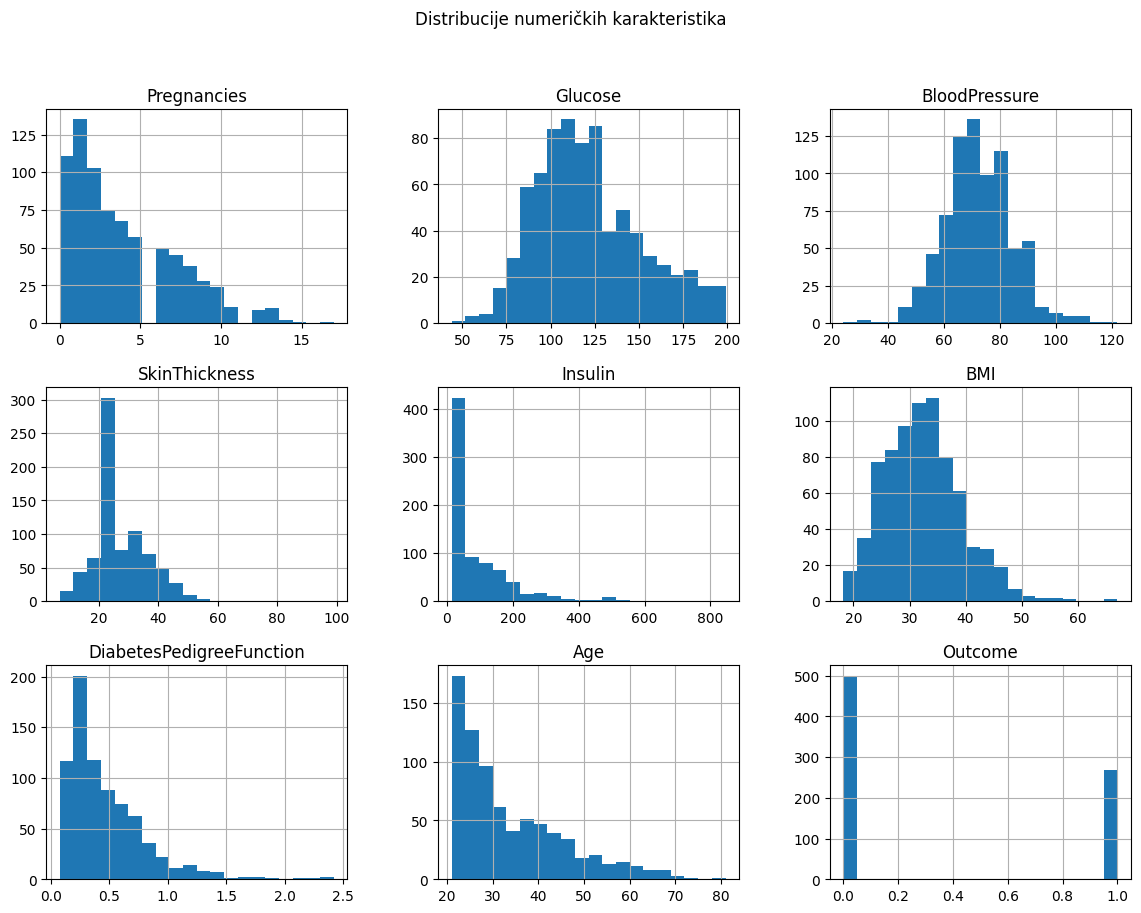

In [18]:
# Histograms
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribucije numeričkih karakteristika")
plt.show()

In [19]:
# Standardizacija podataka
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("Outcome", axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["Outcome"] = df["Outcome"]

In [24]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732,1


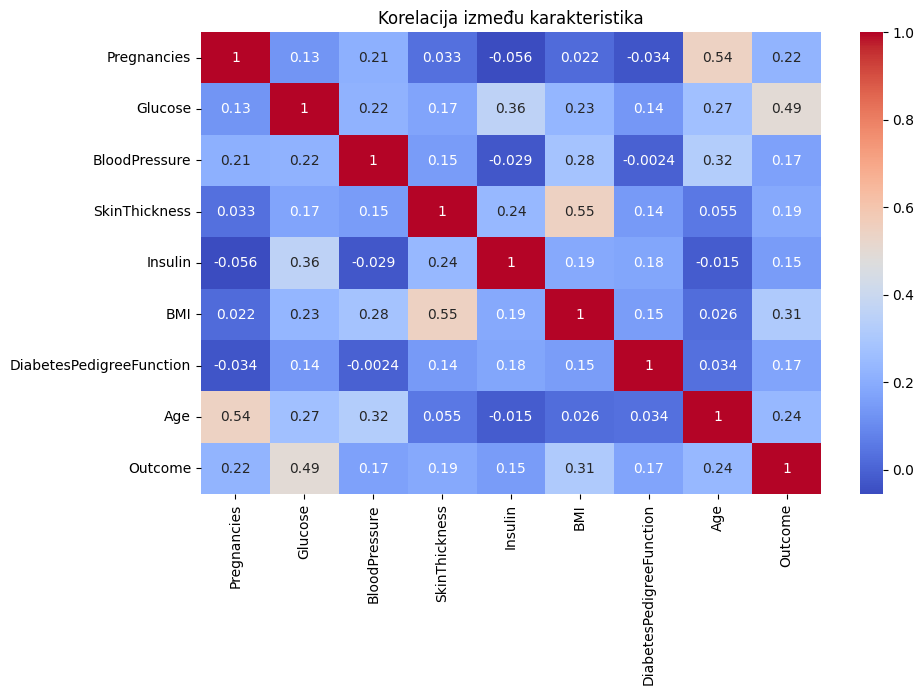

In [25]:
# Korelacijska matrica
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Korelacija između karakteristika")
plt.show()

In [26]:
# Selektovanje karakteristika na osnovu korelacije
cor_target = abs(df_scaled.corr()["Outcome"])
relevant_features = cor_target[cor_target > 0.2]
print(relevant_features)

Pregnancies    0.221898
Glucose        0.492782
BMI            0.312249
Age            0.238356
Outcome        1.000000
Name: Outcome, dtype: float64


In [22]:
# Permutacijska važnost karakteristika
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X = df_scaled.drop("Outcome", axis=1)
y = df_scaled["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
})
importance_df.sort_values(by="importance", ascending=False)

,feature,importance
1,Glucose,0.138961
5,BMI,0.050000
7,Age,0.026623
6,DiabetesPedigreeFunction,0.012338
2,BloodPressure,0.009740
0,Pregnancies,0.001948
4,Insulin,0.000649
3,SkinThickness,-0.000649


## SHAP analiza (interpretabilnost modela)
Koristimo SHAP (SHapley Additive exPlanations) za dodatno razumijevanje utjecaja svake karakteristike na odluku modela.

In [ ]:
pip install shap


In [ ]:
pip install xgboost

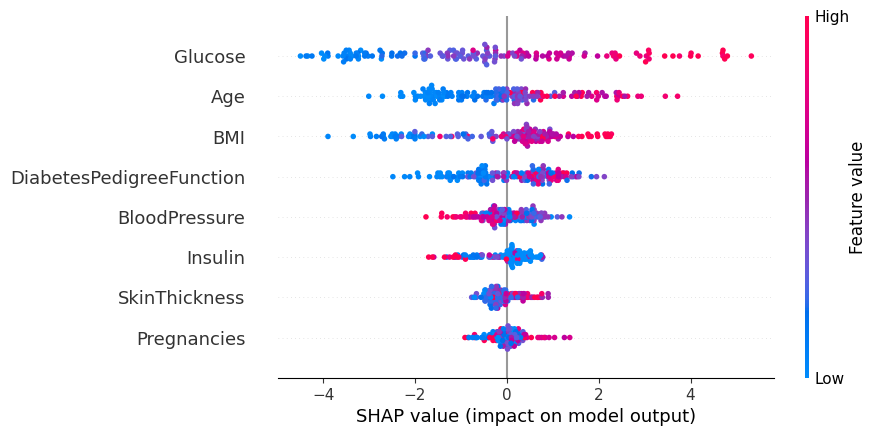

In [ ]:
import shap
import xgboost

# Treniranje XGBoost modela za SHAP
xgb = xgboost.XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

# Kreiranje SHAP explainer-a
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Prikaz beeswarm grafa
shap.plots.beeswarm(shap_values)

###  Tumačenje SHAP grafa

Ovaj graf prikazuje utjecaj svake karakteristike na odluku modela — u ovom slučaju, predikciju dijabetesa.

####  Kako čitati graf:
- **Y-os**: Imena karakteristika (feature-a), sortirana po značaju.
- **X-os**: SHAP vrijednosti — utjecaj karakteristike na predikciju:
  - Vrijednosti > 0: karakteristika povećava vjerovatnoću dijabetesa.
  - Vrijednosti < 0: karakteristika smanjuje vjerovatnoću dijabetesa.
- **Boje tačaka**:
  - 🔴 Crvena: visoka vrijednost karakteristike.
  - 🔵 Plava: niska vrijednost karakteristike.

####  Primjeri interpretacije:

- **Glucose**:
  - Ima najveći utjecaj na odluku modela.
  - Visoke vrijednosti glukoze (crvene tačke) pomjeraju SHAP vrijednost udesno → veći rizik od dijabetesa.
  - Niske vrijednosti (plave tačke) pomjeraju SHAP vrijednost ulijevo → manji rizik.

- **Age**:
  - Starije osobe (crveno) imaju veću vjerovatnoću dijabetesa.
  - Mlađe osobe (plavo) doprinose negativnom ishodu (nema dijabetesa).

- **BMI**:
  - Slično kao i glukoza: visoki BMI podiže vjerovatnoću, niski BMI je zaštitni faktor.

- **Insulin, BloodPressure, SkinThickness**:
  - Imaju manji utjecaj – njihove SHAP vrijednosti su koncentrisane oko nule.

- **Pregnancies**:
  - Učinak je umjeren – više trudnoća blago povećava rizik.

SHAP dijagram nam omogućava:
- da rangiramo karakteristike po značaju,
- da razumijemo *u kojem smjeru* (pozitivan/negativan) one utiču na model,
- i da povećamo povjerenje u predikcije modela kroz transparentnost.



##  Zaključak
- Obradili smo podatke zamjenom nula i standardizacijom.
- Vizualno smo analizirali raspodjele i outliere.
- Koristili smo korelaciju, permutacije i SHAP za odabir i tumačenje važnih karakteristika.